## ECE657A Assignment 3

**Collaborators:**

- Yanhao Lin 20481552
- Mingrui Zhang 20985422

## Load the data

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import SGD
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the data
x_train = pd.read_csv('x_train.csv').values
y_train = pd.read_csv('y_train.csv').values
x_test = pd.read_csv('x_test.csv').values
y_test = pd.read_csv('y_test.csv').values

## Pre-process

In [ ]:
# Reshape the input data to 28x28 grayscale images
# 1. The first dimension represents the number of images in the 
#   dataset, and is specified by the -1 argument. This dimension 
#   will be automatically calculated based on the total number of 
#   elements in the input array, divided by the size of the other 
#   dimensions.
# 2. The second and third dimensions represent 
#   the height and width of each image, respectively, and are both 
#   set to 28.
# 3. The fourth dimension represents the depth or number of channels 
#   of the image, and is set to 1 in this case since the images 
#   are grayscale. If the images were in color, the depth would 
#   typically be 3 for red, green, and blue channels.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the target labels to one-hot encoding, 
# one-hot encoding is needed to calculate the categorical accuracy
# metric.
# Using one-hot encoding for the class labels allows us to represent 
# the class information in a way that is compatible with 
# most machine learning models. In particular, it allows us to use 
# a categorical cross-entropy loss function during training, which is 
# commonly used for multiclass classification problems.
y_train = pd.get_dummies(y_train.ravel()).values
y_test = pd.get_dummies(y_test.ravel()).values

## Q1 - CNN Model

In [ ]:
# Define the model architecture
model_q1 = Sequential()
# ReLU activation
# Convolutional layer with 32, 3x3 filters, stride 1, padding 1x1
model_q1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
# Max pooling layer 2,2
model_q1.add(MaxPooling2D((2, 2)))
# Convolutional layer with 32, 3x3 filters, stride 1, padding 1x1
model_q1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Flatten the output
# Flatten layer is a type of layer that is commonly used to 
# convert multidimensional input data into a one-dimensional array.
model_q1.add(Flatten())
# Output/Softmax layer
model_q1.add(Dense(5, activation='softmax'))

# Define the optimizer and compile the model
# Stochastic Gradient Descent
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model using the specified optimizer, loss function, and metrics
model_q1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model_q1.summary()

for i, layer in enumerate (model_q1.layers):
  if hasattr(layer, "activation"):
    print('Layer ' + str(i) + ' activation info:')
    print(layer)
    print('activation: ',layer.activation)

# Train the model
history_q1 = model_q1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15, batch_size=32)

# Evaluate the model on the test data
test_loss, test_acc = model_q1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 flatten_8 (Flatten)         (None, 6272)              0         
                                                                 
 dense_10 (Dense)            (None, 5)                 31365     
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
__________________________________________________

## Q2 - Your Own Network

- Design One:

In [ ]:
# Define the model architecture
model_q2_d1 = Sequential()
model_q2_d1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_q2_d1.add(Conv2D(64, (3, 3), activation='relu'))
model_q2_d1.add(MaxPooling2D(pool_size=(2, 2)))
model_q2_d1.add(Dropout(0.25))
model_q2_d1.add(Flatten())
model_q2_d1.add(Dense(128, activation='relu'))
model_q2_d1.add(Dropout(0.5))
model_q2_d1.add(Dense(5, activation='softmax'))

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

# Define the optimizer and compile the model
# Stochastic Gradient Descent
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model using the specified optimizer, loss function, and metrics
model_q2_d1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_q2_d1.summary()

for i, layer in enumerate (model_q2_d1.layers):
  if hasattr(layer, "activation"):
    print('Layer ' + str(i) + ' activation info:')
    print(layer)
    print('activation: ',layer.activation)

# Train the model
history_q2_d1 = model_q2_d1.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test data
test_loss, test_acc = model_q2_d1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_10 (Flatten)        (None, 9216)              0         
                                                                 
 dense_13 (Dense)            (None, 128)               1179776   
                                                     

- Design two:

In [27]:
# Define the model architecture
model_q2_d2 = Sequential()
model_q2_d2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_q2_d2.add(Conv2D(64, (3, 3), activation='relu'))
model_q2_d2.add(MaxPooling2D(pool_size=(2, 2)))
model_q2_d2.add(Dropout(0.25))
model_q2_d2.add(Flatten())
model_q2_d2.add(Dense(128, activation='relu'))
model_q2_d2.add(Dropout(0.5))
model_q2_d2.add(Dense(5, activation='softmax'))

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

# Compile the model using the specified optimizer, loss function, and metrics
model_q2_d2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model_q2_d2.summary()

for i, layer in enumerate (model_q2_d2.layers):
  if hasattr(layer, "activation"):
    print('Layer ' + str(i) + ' activation info:')
    print(layer)
    print('activation: ',layer.activation)

# Train the model
history_q2_d2 = model_q2_d2.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test data
test_loss, test_acc = model_q2_d2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_12 (Flatten)        (None, 9216)              0         
                                                                 
 dense_17 (Dense)            (None, 128)               1179776   
                                                     

## Q3 - Results Analysis

- Q1

In [29]:
# Evaluate the model on the test data
%timeit test_loss, test_acc = model_q1.evaluate(x_test, y_test, verbose=0)

2.48 s ± 281 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


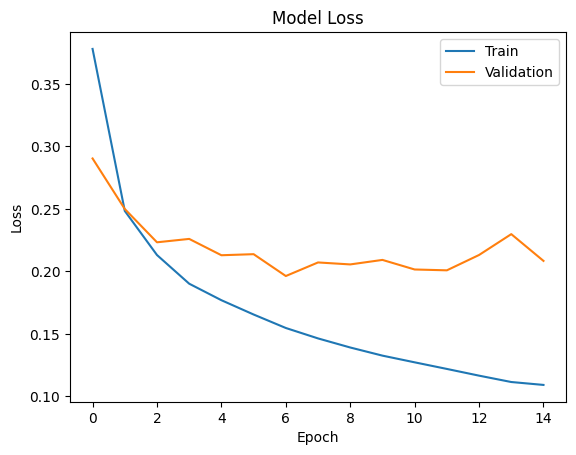

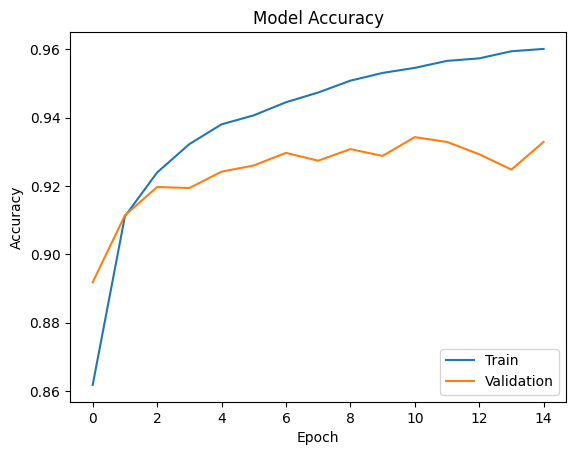

In [30]:
# Plot the training and validation loss for each epoch
plt.plot(history_q1.history['loss'])
plt.plot(history_q1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy for each epoch
plt.plot(history_q1.history['accuracy'])
plt.plot(history_q1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

- Q2 - D1

In [31]:
# Evaluate the model on the test data
%timeit test_loss, test_acc = model_q2_d1.evaluate(x_test, y_test, verbose=0)

7.49 s ± 1.91 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


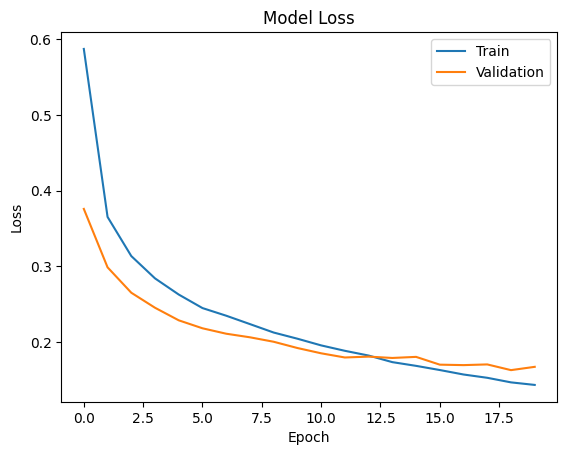

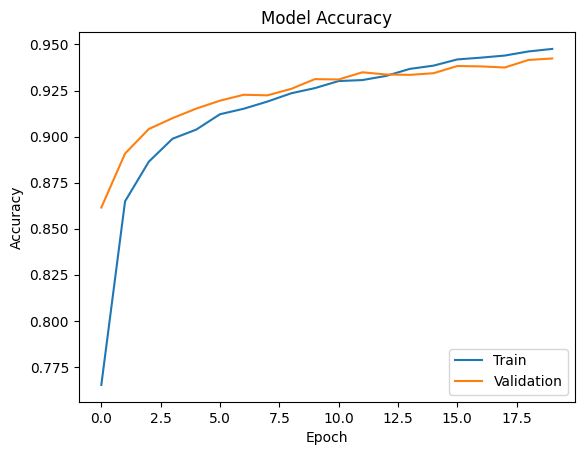

In [32]:
# Plot the training and validation loss for each epoch
plt.plot(history_q2_d1.history['loss'])
plt.plot(history_q2_d1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy for each epoch
plt.plot(history_q2_d1.history['accuracy'])
plt.plot(history_q2_d1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

- Q2 - D2

In [33]:
# Evaluate the model on the test data
%timeit test_loss, test_acc = model_q2_d2.evaluate(x_test, y_test, verbose=0)

6.22 s ± 693 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


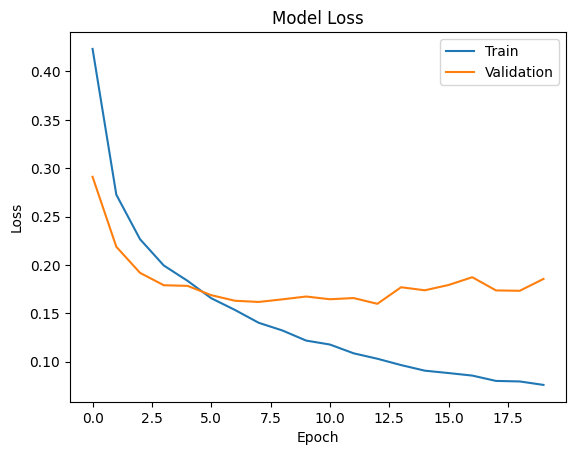

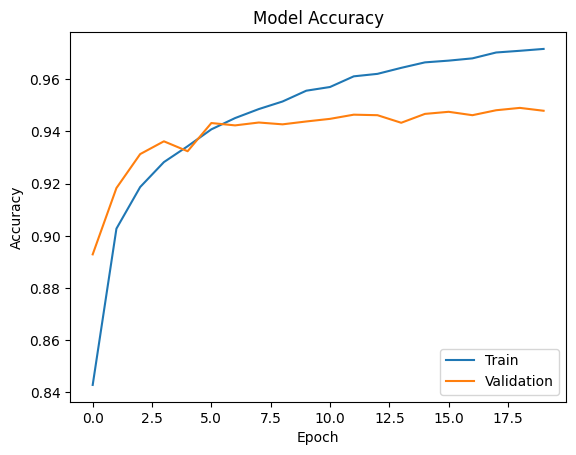

In [34]:
# Plot the training and validation loss for each epoch
plt.plot(history_q2_d2.history['loss'])
plt.plot(history_q2_d2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the training and validation accuracy for each epoch
plt.plot(history_q2_d2.history['accuracy'])
plt.plot(history_q2_d2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Q4 - Using Your Own Encoding

- We use the model from Q2-D2

In [40]:
import seaborn as sns

1. Extract encoding

In [36]:
# Define the intermediate layer model
intermediate_layer_model = Model(inputs=model_q2_d2.input, outputs=model_q2_d2.layers[-2].output)

# Get the intermediate layer output for the test data
intermediate_output = intermediate_layer_model.predict(x_test)

# Convert y_test back to a single array
y_test = np.argmax(y_test, axis=1)

313/313 [==============================] - 7s 23ms/step


2. PCA

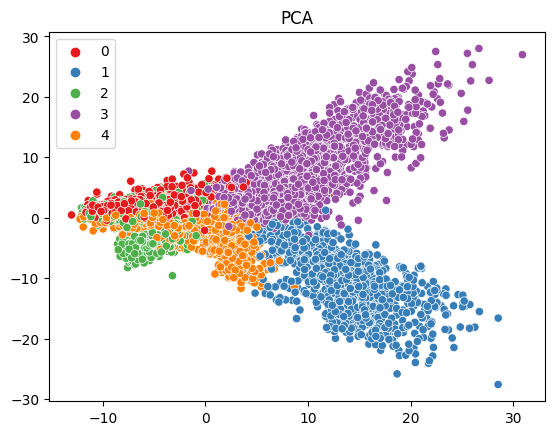

In [65]:
# Perform PCA on the intermediate output
pca = PCA(n_components=2)
pca_output = pca.fit_transform(intermediate_output)

# Visualize the PCA output with label colors
plt.title('PCA')
sns.scatterplot(x=pca_output[:, 0],
        y=pca_output[:, 1],
        palette='Set1',
        hue=y_test)
plt.legend()
plt.show()

3. DBSCAN and K-means

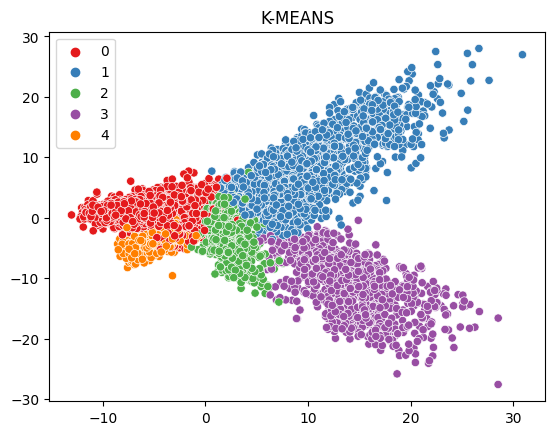

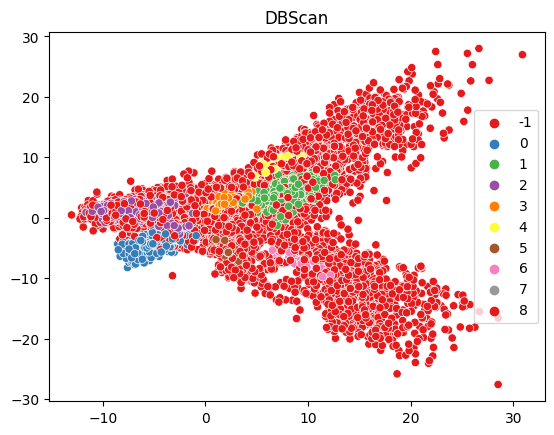

In [66]:
# DBSCAN and K-means
kmeans = KMeans(n_init=10 ,n_clusters=5)
dbscan = DBSCAN(eps=5, min_samples=10)

# Perform clustering on the intermediate output
kmeans_output = kmeans.fit_predict(intermediate_output)
dbscan_output = dbscan.fit(intermediate_output)

# Visualize the clustering output with label colors
plt.title('K-MEANS')
sns.scatterplot(x=pca_output[:, 0],
        y=pca_output[:, 1],
        palette='Set1',
        hue=kmeans_output)
plt.show()

plt.title('DBScan')
sns.scatterplot(x=pca_output[:, 0],
        y=pca_output[:, 1],
        palette='Set1',
        hue=dbscan_output.labels_)
plt.show()


4. t-SNE

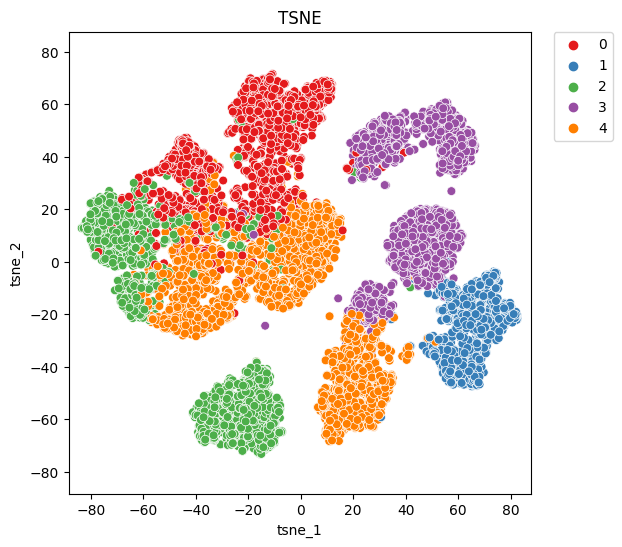

In [62]:
tsne = TSNE(n_components=2)

# Perform t-SNE on the intermediate output
tsne_output = tsne.fit_transform(intermediate_output)

tsne_result_df = pd.DataFrame(
    {'tsne_1': tsne_output[:, 0], 'tsne_2': tsne_output[:, 1], 'label': y_test})
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, palette='Set1', ax=ax, s=40)
lim = (tsne_output.min() - 5, tsne_output.max() + 5)
ax.title.set_text('TSNE')
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

- List out a random selection of data entries (the original images) for each cluster and their label value to help understand the patterns each cluster
might represent.

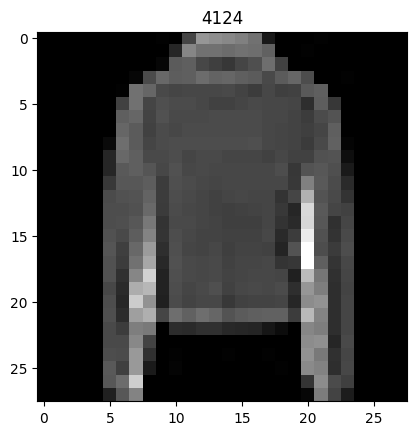

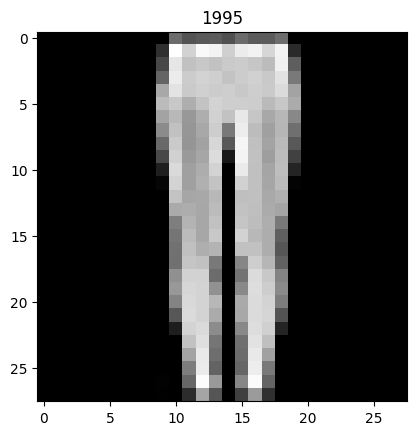

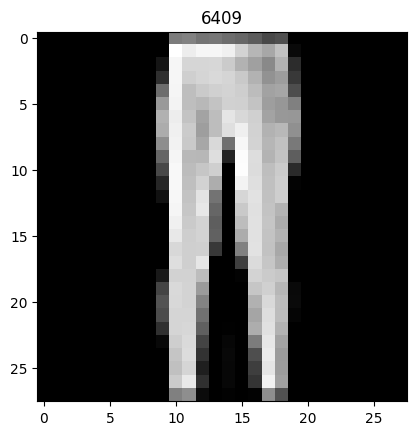

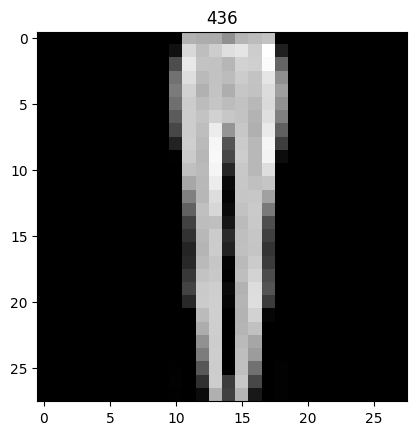

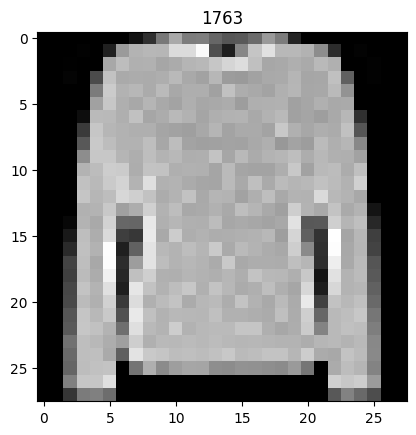

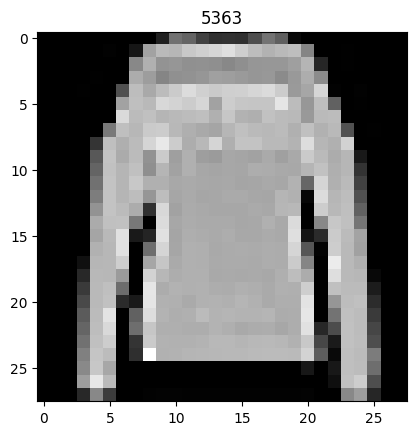

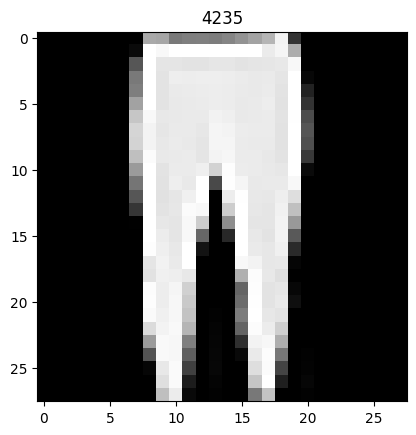

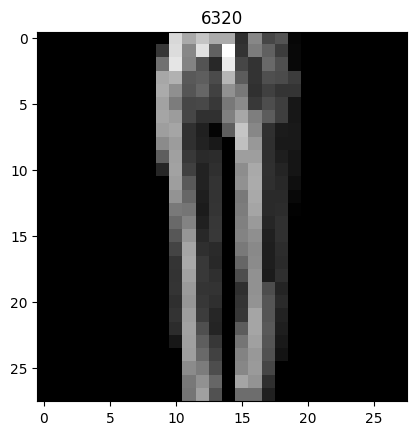

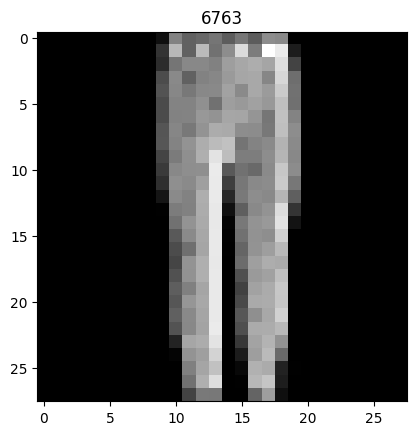

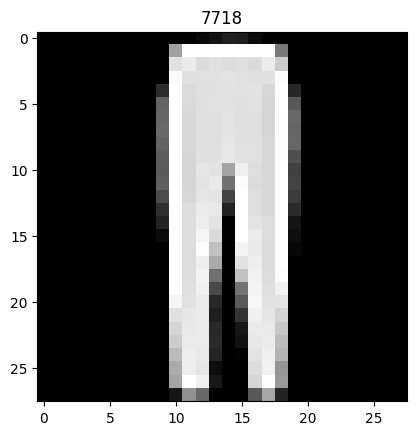

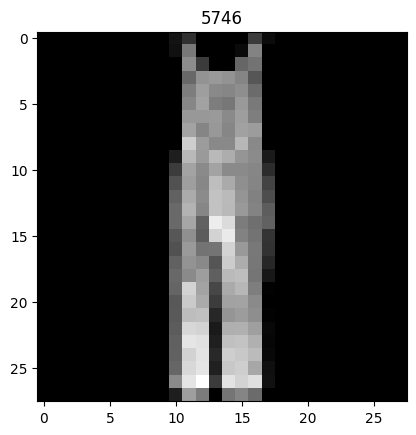

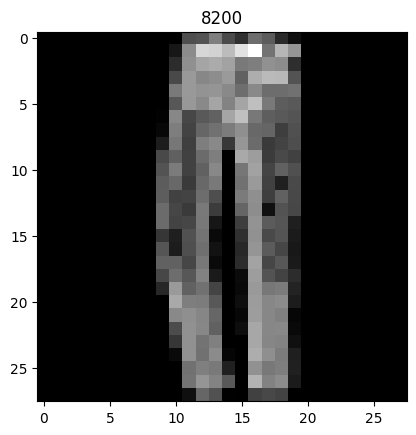

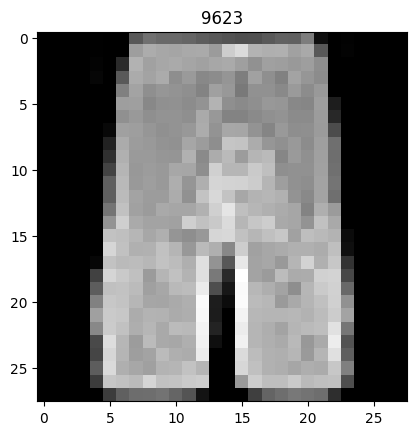

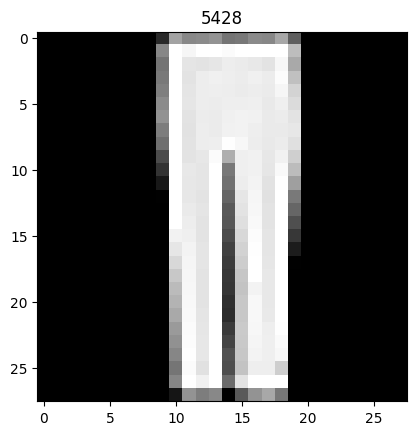

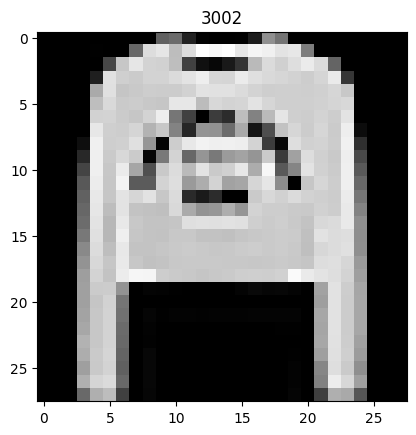

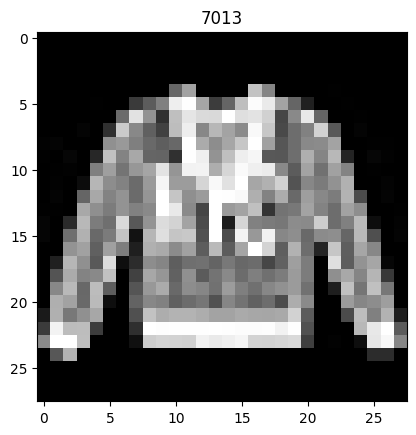

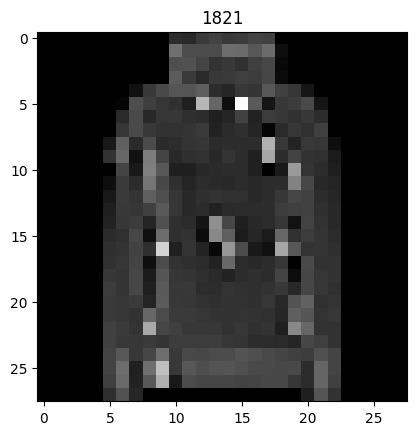

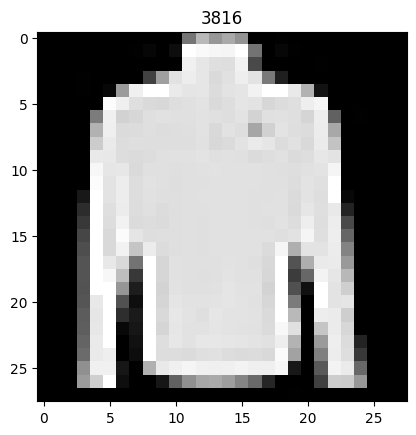

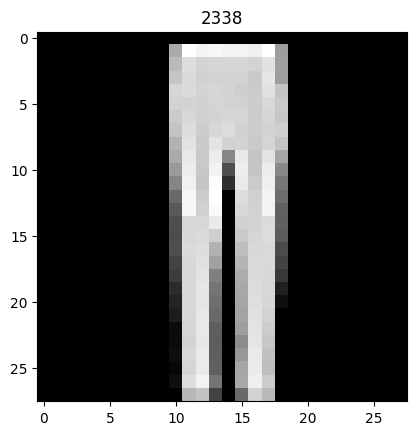

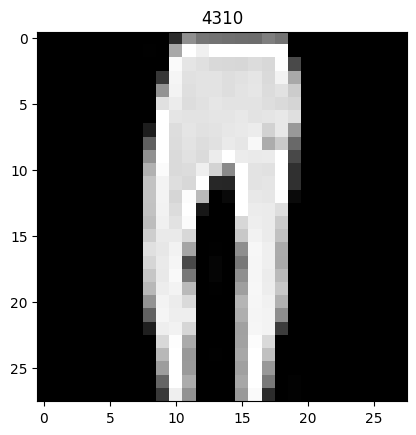

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

x_test = pd.read_csv('x_test.csv').values
y_test = pd.read_csv('y_test.csv').values

zero = [i for i, x in enumerate(y_test) if x == 0]
one = [i for i, x in enumerate(y_test) if x == 1]
two = [i for i, x in enumerate(y_test) if x == 2]
three = [i for i, x in enumerate(y_test) if x == 3]
four = [i for i, x in enumerate(y_test) if x == 4]

selected_indexes = random.sample(two, 20)

for i in selected_indexes:
    row_of_values = x_test[i]
    pixels = np.reshape(row_of_values, (28, 28))
    plt.title(i)
    plt.imshow(pixels, cmap='gray')
    plt.show()